# Twitter Tweet Sentiment Analysis 
##### Udacity Machine Learning Engineer Nanodegree Capstone project

##### Sujay Bhowmick
8th August 2018

### Project Goal

In NLP sentiment analysis is the most common problems through which we try to infer the sentiment of sentence or a paragraph. 

The goal of this Machine Learning Nanodegree Capstone project is to analyse the sentiment of various twitter tweets which is publicly available.

The tweets are related to financial news which have been labelled by a human for training and testing purpose of the Machine Learning model. There are approximately 8000 tweets which have been labelled with labels **Positive** and **Negative** for tweets indicating a **Positive** sentiment and **Negative** sentiment respectively.

Further some preprocessing is performed on the raw tweets to remove certain punctuations, links, tweet handles and certain special characters.

### Data
Let's take a look at data. The labels are encoded in the dataset: **0** is for **Negative** and **1** for a **Positive** sentiment

In [1]:
# Loading the preprocessed csv file into pandas and dropping the msg_id column

import pandas as pd
base_dir = "data"
# Read the twitter data file csv
df = pd.read_csv(base_dir + "/preprocessed_tweets2.csv", encoding='latin-1')
df = df.drop(columns=['msg_id'])
df

,content,label
0,omg its already 7:30 :O,1
1,Juuuuuuuuuuuuuuuuussssst Chillin!!,1
2,handed in my uniform today . i miss you already,1
3,hmmmm.... i wonder how she my number <NAME/>,1
4,thanks to all the haters up in my face all day...,1
5,Feeling strangely fine. Now I'm gonna go liste...,1
6,You're the only one who can see this cause no ...,1
7,"goodbye exams, HELLO ALCOHOL TONIGHT",1
8,uploading pictures on friendster,1
9,(: !!!!!! - so i wrote something last week. an...,1


In [2]:
positive_count = len(df[df['label'] == 1])
negative_count = len(df[df['label'] == 0])
print("Positive:", positive_count)
print("Negative:", negative_count)
print("Total:", positive_count + negative_count)

Positive: 776000
Negative: 777000
Total: 1553000


Split the tweet dataset into training and test datasets using sklearn's split function

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print(train.shape)
print(test.shape)

(1242400, 2)
(310600, 2)


Use a custom tokenizer to understand the distribution of words in the tweets dataset. We see that the maximum number of token in the training dataset is around 20. This provides us a good input feature of the tweet content which can be used for building the classifier

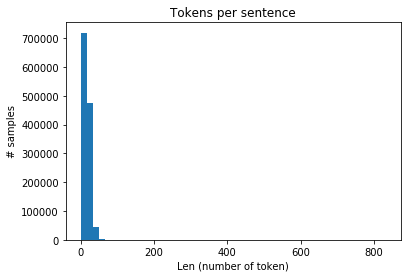

In [6]:
import re
import string
import os
import matplotlib
import matplotlib.pyplot as plot
from keras.preprocessing.text import Tokenizer

# Tokenize
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
# Plot 
plot.hist([len(tokenize(s)) for s in train['content'].values], bins=50)
plot.title('Tokens per sentence')
plot.xlabel('Len (number of token)')
plot.ylabel('# samples')
plot.show()

### Training Parameters (Hyper Parameters)
We'll set the following hyperparameters for training our model.
The above token per word plot, is used to determine the MAX_LEN which is according to plot is 20

In [7]:
# Number of examples used in each iteration
BATCH_SIZE = 32 
# Size of vocabulary dictionary
VOCAB_SIZE = 30000
# Max length of tweet as per the plot above
MAX_LEN = 20
# Dimension of word embedding vector
EMBEDDING_DIM = 40

### Preprocessing

Before using the data for the model, we need to preprocess the tweet content. For this purpose we will use Keras Tokenizer to convert each word into a corresponding integer identifier. In order for us to use the content in the Model we must ensure the length of the content is same. We can do this by using the Keras **sequence.pad_sequences** function. All content greater than MAX_LEN will be truncated and text which are less than MAX_LEN will be padded to get the same length

In [8]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model

import tensorflow as tf
import numpy as np

from tensorflow import set_random_seed
from numpy.random import seed

seed(1)
set_random_seed(2)

tweet_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tweet_tokenizer.fit_on_texts(train['content'].values)

x_train_seq = tweet_tokenizer.texts_to_sequences(train['content'].values)
x_test_seq = tweet_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_test = sequence.pad_sequences(x_test_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_test = train['label'].values, test['label'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 <NAME/> it's your birthday today? If so 

First sample after preprocessing: 
 [  1  45  48 266  40  79  16   0   0   0   0   0   0   0   0   0   0   0
   0   0]


### Model Architecture
I have used a model based on Kim Yoon’s [Convolutional Neural Networks for Sentence Classification.](https://arxiv.org/abs/1408.5882)

![title](img/CNN_Architecture.png)

In [9]:
# CNN Model

NUM_FILTERS = 250
KERNEL_SIZE = 3
HIDDEN_DIMS = 250

print('Build model...')
model = Sequential()

# We use embedding layer which maps our vocabulary indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# Adding Convolution1D
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# Add a max pooling:
model.add(GlobalMaxPooling1D())

# Add a simple hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and use sigmoid function
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            1200000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 18, 250)           30250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0     

### Train and Evaluate

In [ ]:
EPOCHS = 3 # Number of passes through entire dataset
history = model.fit(x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_split=0.1)

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_test)

print(history.history.keys())
# summarize history for accuracy
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper left')
plot.show()
# summarize history for loss
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper left')
plot.show()

Train on 1118160 samples, validate on 124240 samples
Epoch 1/3
 940736/1118160 [========================>.....] - ETA: 1:05 - loss: 0.4136 - acc: 0.8119

### Confusion Matrix and Precision, Recall and F1-Score

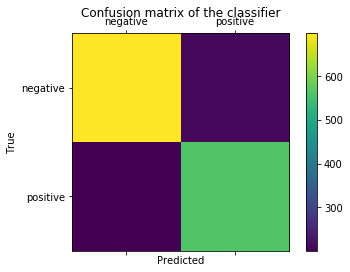

             precision    recall  f1-score   support

   negative       0.77      0.78      0.77       898
   positive       0.74      0.73      0.73       773

avg / total       0.75      0.75      0.75      1671



In [24]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

SENTIMENT_LABELS = ['negative', 'positive']

cm = confusion_matrix(y_test, pred)
fig = plot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plot.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + SENTIMENT_LABELS)
ax.set_yticklabels([''] + SENTIMENT_LABELS)
plot.xlabel('Predicted')
plot.ylabel('True')
plot.show()

# Precision,Recall, F1-Score Report
report = classification_report(pred, y_test, target_names=SENTIMENT_LABELS)
print(report)

### Test the Model we just trained

In [59]:
SENTIMENT_LABELS = ['negative', 'positive']
def predict(tweet):
    # Preprocessing step
    tweet_words_array = tweet_tokenizer.texts_to_sequences([tweet])
    tweet_words_array = sequence.pad_sequences(tweet_words_array, maxlen=MAX_LEN, padding="post", value=0)
    
    #Predict the sentiment label and score
    score = model.predict(tweet_words_array)[0][0]
    prediction = SENTIMENT_LABELS[model.predict_classes(tweet_words_array)[0][0]]
    print('Tweet:', tweet, '\nPrediction:', prediction, '\nScore: ', score)
    print('\n')

predict(". RT @SpryGuy: The CEO of Papa John's stiffs and cheats his own employees so he can live in this castle with a moat. NEVER buy Papa John's pi…")
predict(". GVC Holdings consummated the acquisition of Ladbrokes Coral https://t.co/xaN4ACA0h6 https://t.co/ZNm0gmXLK7")
predict(". family fully prepared to drop Roku, Apple iPhones , Amazon Prime, toss out Alexa,Google emails chromes, etc in the… https://t.co/64cZYuhYSQ")
predict(". #AtlasMara holding is a real ingenious feat in The financial fraternity..am amazed at the forge ahead they posses.. #mindblown")
predict(". Boeing hit hard by tariff and trade war headlines today, down -3.5%. Also note the very ugly price/momentum diverge https://t.co/h9bfT95yWZ")
predict("RT @CentroneInvests: \"Be prepared 4 the crash of the dollar invest in precious metals for security!\" #Invest4Success #Investors ??on eBay ht…")
predict("Didn't see this one coming but makes so much sense... Amazon to Buy Whole Foods in $13.4 Billion Deal https://t.co/tKcF9dUwct")

Tweet: . RT @SpryGuy: The CEO of Papa John's stiffs and cheats his own employees so he can live in this castle with a moat. NEVER buy Papa John's pi… 
Prediction: negative 
Score:  0.112056755


Tweet: . GVC Holdings consummated the acquisition of Ladbrokes Coral https://t.co/xaN4ACA0h6 https://t.co/ZNm0gmXLK7 
Prediction: positive 
Score:  0.91837984


Tweet: . family fully prepared to drop Roku, Apple iPhones , Amazon Prime, toss out Alexa,Google emails chromes, etc in the… https://t.co/64cZYuhYSQ 
Prediction: negative 
Score:  0.059685603


Tweet: . #AtlasMara holding is a real ingenious feat in The financial fraternity..am amazed at the forge ahead they posses.. #mindblown 
Prediction: positive 
Score:  0.9210646


Tweet: . Boeing hit hard by tariff and trade war headlines today, down -3.5%. Also note the very ugly price/momentum diverge https://t.co/h9bfT95yWZ 
Prediction: negative 
Score:  0.26695374


Tweet: RT @CentroneInvests: "Be prepared 4 the crash of the dollar invest in p

### Save Model

In [60]:
import pickle

# Saving Tokenizer
with open('models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tweet_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save model
model.save_weights('models/cnn_twitter_sentiment_weights.h5')

model_json = model.to_json()
with open("models/model.json", "w") as json_file:
    json_file.write(model_json)